In [9]:
from matplotlib import pyplot as plt
from scipy.stats import binom
from scipy.stats import multivariate_normal as norm
from scipy.stats import multivariate_t as t
from sklearn.linear_model import LinearRegression as Linear
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KernelDensity as KDE
from scipy.spatial import Delaunay as TRI
from scipy.interpolate import LinearNDInterpolator as ITP
import numpy as np
import seaborn as sb
import pandas as pd
from arch.univariate import arch_model
import datetime as dt
import arch.data.sp500

In [1]:
cd /Users/ianfla/Documents/packages
git clone https://github.com/RJT1990/pyflux.git
cd particles
python3 setup.py install

正克隆到 'pyflux'...
remote: Enumerating objects: 2290, done.
remote: Total 2290 (delta 0), reused 0 (delta 0), pack-reused 2290
接收对象中: 100% (2290/2290), 3.85 MiB | 10.03 MiB/s, 完成.
处理 delta 中: 100% (1541/1541), 完成.


In [11]:
import pyflux as pf
from pandas_datareader import DataReader

jpm = DataReader('JPM',  'yahoo', dt(2006,1,1), dt(2016,3,10))
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns);
plt.ylabel('Returns');
plt.title('JPM Returns');

TypeError: 'module' object is not callable

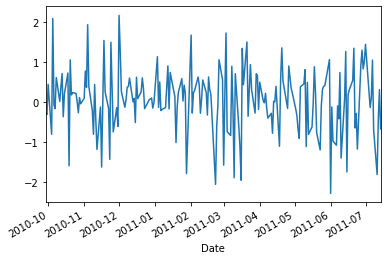

In [2]:
st=dt.datetime(2010,9,28)
en=dt.datetime(2011,7,14)
data=arch.data.sp500.load()
market=data.loc[st:en,"Adj Close"]
returns=100*market.pct_change().dropna()
ax=returns.plot()
xlim=ax.set_xlim(returns.index.min(), returns.index.max())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 799.7866535139186
Iteration:      2,   Func. Count:     13,   Neg. LLF: 237.53569976727374
Iteration:      3,   Func. Count:     20,   Neg. LLF: 248.59515701530782
Iteration:      4,   Func. Count:     26,   Neg. LLF: 236.47276767963737
Iteration:      5,   Func. Count:     30,   Neg. LLF: 236.47181340031466
Iteration:      6,   Func. Count:     34,   Neg. LLF: 236.471747407169
Iteration:      7,   Func. Count:     37,   Neg. LLF: 236.47174740734172
Optimization terminated successfully    (Exit mode 0)
            Current function value: 236.471747407169
            Iterations: 7
            Function evaluations: 37
            Gradient evaluations: 7
                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.005
Vol Model:                      GARCH   Log-Likel

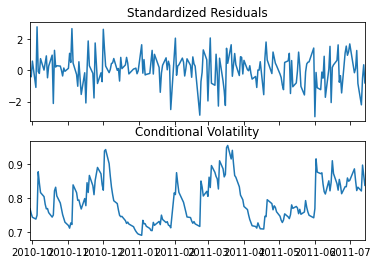

In [3]:
res=arch_model(returns,mean='Zero').fit()
print(res.summary())
res.plot()
plt.show()